In [1]:
import numpy as np
import pandas as pd
import os

from sklearn.metrics import average_precision_score
from sklearn.utils import shuffle

from pycaret.classification import *

from infra_utils import get_raw_data

In [2]:
data_file = ('dataset' +  os.path.sep +  'creditcard.csv')
data_file

'dataset\\creditcard.csv'

In [3]:
df = pd.read_csv(data_file)

In [4]:
# df.head()

In [5]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

## Under Sampling

In [6]:
df_train, df_test = get_raw_data(df)

In [7]:
df_train['target'].value_counts()

target
0    1916
1     321
Name: count, dtype: int64

In [8]:
df_test['target'].value_counts()

target
0    932
1    171
Name: count, dtype: int64

## Create new models by py caret

In [9]:
%%time

# pycaret.classification library:

clf1 = setup(data=df_train,
            target='target',
             # silent=True,
             log_experiment=True,
             use_gpu=False,
             experiment_name='ml_core'
            )


add_metric(id='apc', name='APC', score_func=average_precision_score, target='pred_proba')

best_model = compare_models()

,Description,Value
0,Session id,8909
1,Target,target
2,Target type,Binary
3,Original data shape,"(2237, 31)"
4,Transformed data shape,"(2237, 31)"
5,Transformed train set shape,"(1565, 31)"
6,Transformed test set shape,"(672, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,APC,TT (Sec)
catboost,CatBoost Classifier,0.9795,0.9816,0.8567,1.0000,0.9217,0.9100,0.9143,0.9514,5.6510
et,Extra Trees Classifier,0.9789,0.9770,0.8524,1.0000,0.9193,0.9073,0.9118,0.9498,0.1190
lightgbm,Light Gradient Boosting Machine,0.9789,0.9779,0.8613,0.9900,0.9202,0.9081,0.9116,0.9479,0.2740
rf,Random Forest Classifier,0.9770,0.9733,0.8478,0.9911,0.9123,0.8992,0.9038,0.9434,0.2760
xgboost,Extreme Gradient Boosting,0.9757,0.9799,0.8567,0.9710,0.9087,0.8948,0.8981,0.9521,0.1050
lr,Logistic Regression,0.9744,0.9680,0.8569,0.9620,0.9047,0.8901,0.8931,0.9363,1.7070
gbc,Gradient Boosting Classifier,0.9744,0.9807,0.8613,0.9567,0.9051,0.8904,0.8929,0.9477,0.6540
ada,Ada Boost Classifier,0.9731,0.9656,0.8656,0.9414,0.9012,0.8857,0.8872,0.9395,0.1810
lda,Linear Discriminant Analysis,0.9655,0.9750,0.7721,0.9836,0.8634,0.8440,0.8532,0.9300,0.0190
dt,Decision Tree Classifier,0.9571,0.9191,0.8658,0.8463,0.8536,0.8286,0.8302,0.7531,0.0300


CPU times: total: 25.7 s
Wall time: 2min 8s


In [10]:
best_model

## Fix Imbalance

In [10]:
%%time

# pycaret.classification library:

clf1 = setup(data=df_train,
            target='target',
             # silent=True,
             log_experiment=True,
             use_gpu=False,
             experiment_name='ml_core',
             fix_imbalance=True
            )


add_metric(id='apc', name='APC', score_func=average_precision_score, target='pred_proba')

best_model = compare_models()

,Description,Value
0,Session id,796
1,Target,target
2,Target type,Binary
3,Original data shape,"(2237, 31)"
4,Transformed data shape,"(3352, 31)"
5,Transformed train set shape,"(2680, 31)"
6,Transformed test set shape,"(672, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,APC,TT (Sec)
et,Extra Trees Classifier,0.9815,0.9890,0.8792,0.9904,0.9297,0.9191,0.9224,0.9665,0.1800
rf,Random Forest Classifier,0.9789,0.9860,0.8792,0.9708,0.9213,0.9092,0.9116,0.9588,0.5570
catboost,CatBoost Classifier,0.9789,0.9881,0.8881,0.9626,0.9222,0.9101,0.9121,0.9657,7.0170
xgboost,Extreme Gradient Boosting,0.9770,0.9881,0.8972,0.9400,0.9168,0.9035,0.9047,0.9651,0.1580
lightgbm,Light Gradient Boosting Machine,0.9757,0.9886,0.8749,0.9514,0.9099,0.8959,0.8980,0.9630,0.5290
lr,Logistic Regression,0.9744,0.9837,0.8927,0.9259,0.9079,0.8931,0.8940,0.9562,3.9700
ada,Ada Boost Classifier,0.9732,0.9824,0.8927,0.9173,0.9032,0.8877,0.8888,0.9530,0.7260
gbc,Gradient Boosting Classifier,0.9732,0.9810,0.8883,0.9232,0.9046,0.8890,0.8898,0.9527,1.4450
ridge,Ridge Classifier,0.9668,0.9734,0.8621,0.9027,0.8807,0.8615,0.8626,0.0000,0.1070
lda,Linear Discriminant Analysis,0.9661,0.9741,0.8490,0.9104,0.8772,0.8576,0.8592,0.9089,0.0640


CPU times: total: 11.3 s
Wall time: 3min 3s


## More Options

In [ ]:
%%time

# pycaret.classification library:

clf1 = setup(data=df_train,
            target='target',
             # silent=True,
             log_experiment=True,
             use_gpu=False,
             experiment_name='ml_core_more_ops',
             fix_imbalance=True,
             remove_outliers=True,
             transformation=True,
             # transformation_method=
             feature_interaction=True,
             feature_ratio=True,
             polynomial_features=True,
             feature_selection=True, 
             feature_selection_threshold=0.5,
             remove_multicollinearity=True,
             pca=True,
             pca_components=10,
            )


add_metric(id='apc', name='APC', score_func=average_precision_score, target='pred_proba')

best_model = compare_models()

## Final Model
#### keep best parameters

In [17]:
%%time

# pycaret.classification library:

clf1 = setup(data=df_train,
             target='target',
             log_experiment=True,
             use_gpu=False,
             experiment_name='Final_Model',
             fix_imbalance=True,
             # transformation=True, error
             polynomial_features=True,
             # feature_selection=True, error
             remove_multicollinearity=True,
             multicollinearity_threshold=0.6
             
            )


add_metric(id='apc', name='APC', score_func=average_precision_score, target='pred_proba')

best_model = compare_models()

,Description,Value
0,Session id,1388
1,Target,target
2,Target type,Binary
3,Original data shape,"(2237, 31)"
4,Transformed data shape,"(3352, 79)"
5,Transformed train set shape,"(2680, 79)"
6,Transformed test set shape,"(672, 79)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,APC,TT (Sec)
et,Extra Trees Classifier,0.9668,0.9765,0.8178,0.9446,0.8763,0.8572,0.8604,0.9293,0.8070
catboost,CatBoost Classifier,0.9655,0.9774,0.8581,0.8994,0.8775,0.8575,0.8583,0.9366,15.9180
lightgbm,Light Gradient Boosting Machine,0.9649,0.9736,0.8496,0.9021,0.8741,0.8538,0.8549,0.9295,1.2800
rf,Random Forest Classifier,0.9623,0.9734,0.8405,0.8931,0.8649,0.8431,0.8443,0.9292,1.0760
xgboost,Extreme Gradient Boosting,0.9623,0.9707,0.8494,0.8867,0.8664,0.8445,0.8456,0.9281,1.0520
gbc,Gradient Boosting Classifier,0.9553,0.9739,0.8670,0.8335,0.8483,0.8221,0.8234,0.9270,3.2260
qda,Quadratic Discriminant Analysis,0.9514,0.8887,0.7512,0.8970,0.8161,0.7884,0.7935,0.8101,0.6400
ada,Ada Boost Classifier,0.9495,0.9587,0.8449,0.8154,0.8283,0.7988,0.8000,0.9063,1.1710
lda,Linear Discriminant Analysis,0.9303,0.9299,0.7640,0.7592,0.7590,0.7185,0.7201,0.8009,0.5960
ridge,Ridge Classifier,0.9291,0.9253,0.7599,0.7562,0.7553,0.7140,0.7157,0.0000,0.5530


CPU times: total: 14.4 s
Wall time: 5min 41s


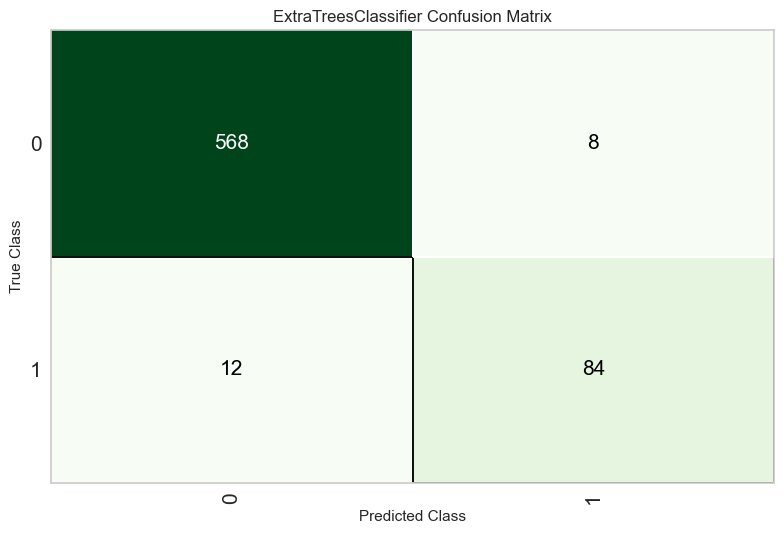

In [19]:
plot_model(best_model, plot = 'confusion_matrix')